# Insurance Cost Prediction with Linear Regression

This notebook demonstrates how to predict insurance charges based on individual attributes using a **Linear Regression** model in Python.

## Objective
The goal is to build a predictive model that estimates insurance costs from factors such as age, sex, BMI, number of children, smoking habits, and region. The model will help understand the relationship between these variables and the insurance charges.

## Dataset
The dataset includes the following features:
- **age**: Age of the individual
- **sex**: Gender of the individual
- **bmi**: Body Mass Index, a measure of body fat
- **children**: Number of children covered by health insurance
- **smoker**: Whether the individual smokes or not
- **region**: Geographical region where the individual resides
- **charges**: The insurance cost billed to the individual (target variable)

## Tools & Libraries
- Python 3.12.11
- pandas, numpy, matplotlib, seaborn
- scikit-learn (LinearRegression, train_test_split, metrics)

## Approach
1. Load and explore the dataset
2. Preprocess data (handle categorical variables, missing values, etc.)
3. Split the data into training and test sets
4. Build and train the Linear Regression model
5. Evaluate the model’s performance using metrics such as RMSE and R²
6. Visualize results and interpret feature impacts


In [15]:
# Import the necessary libraries and some basic EDA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import pickle
import os

data = pd.read_csv('insurance.csv')

print(data.head(3))
print('-'*100)
print(data.info())
print("-" * 100)
print(data.describe())
print("-" * 100)
print(data.isnull().sum())
print("-" * 100)
print(data.shape)
print("-" * 100)
print(data.duplicated().sum())
print("-" * 100)
print(data['sex'].value_counts())
print("-" * 100)
print(data['children'].value_counts())
print("-" * 100)
print(data['smoker'].value_counts())
print("-" * 100)
print(data['region'].value_counts())
print("-" * 100)

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
----------------------------------------------------------------------------------------------------
               age       

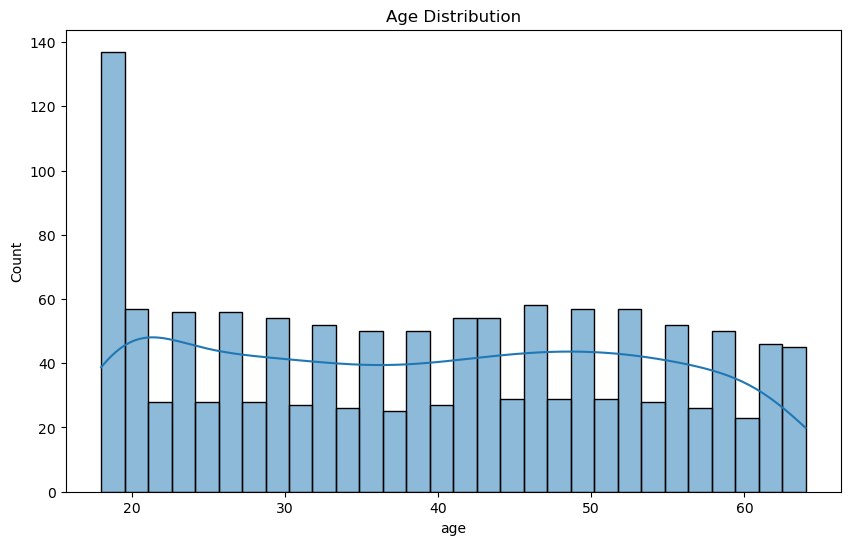

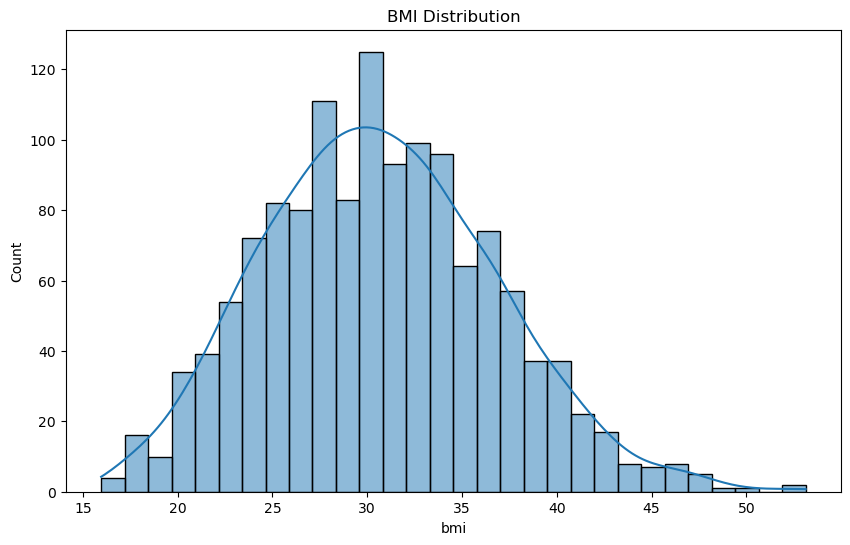

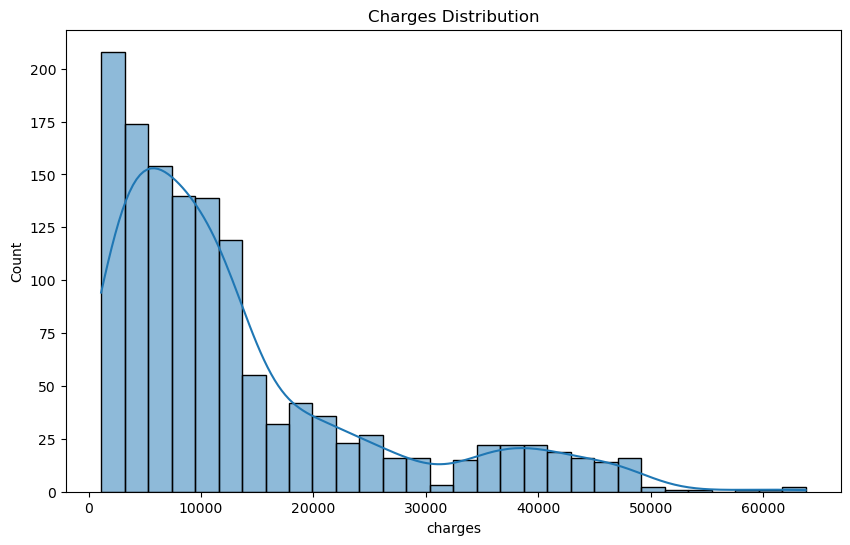

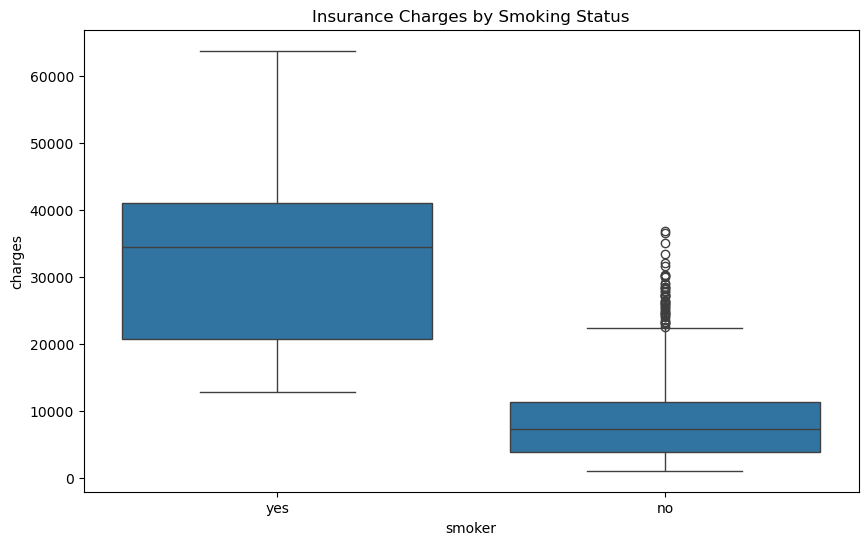

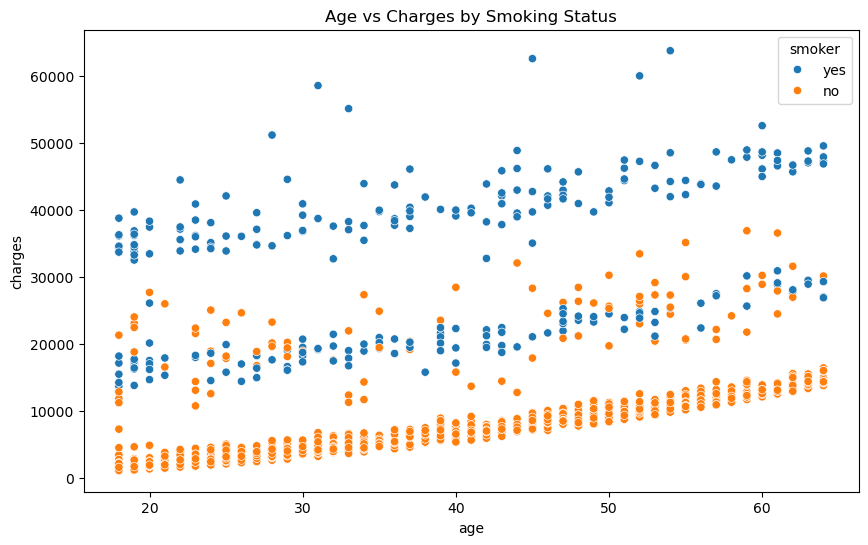

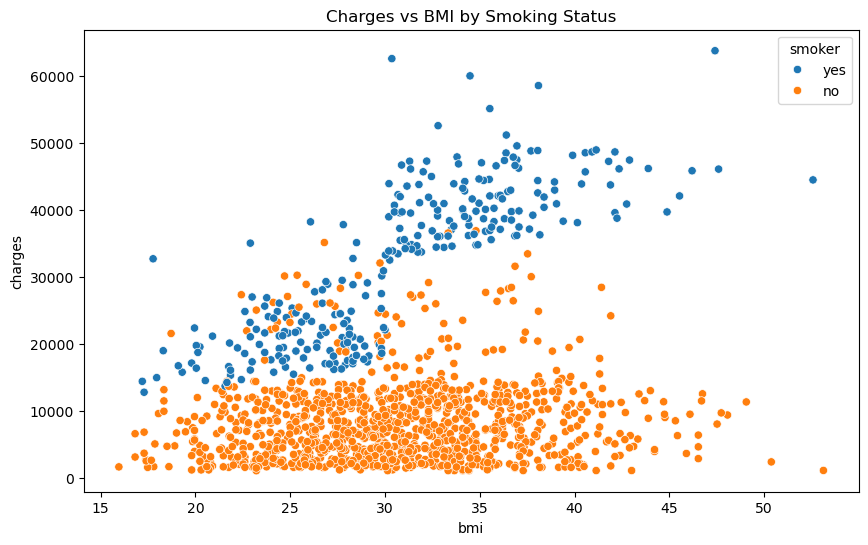

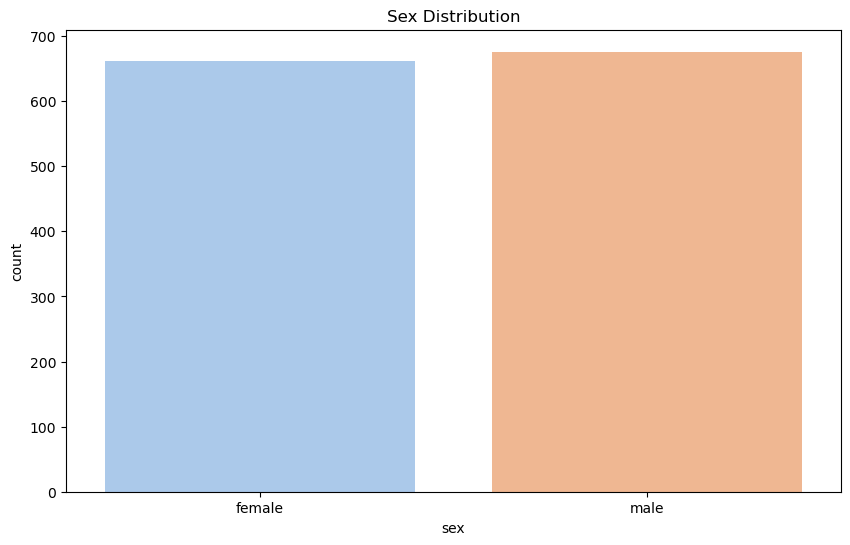

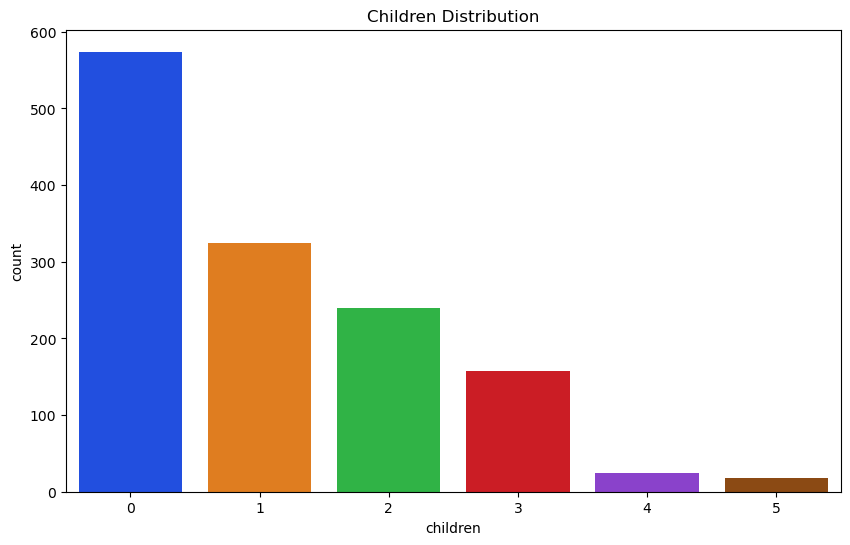

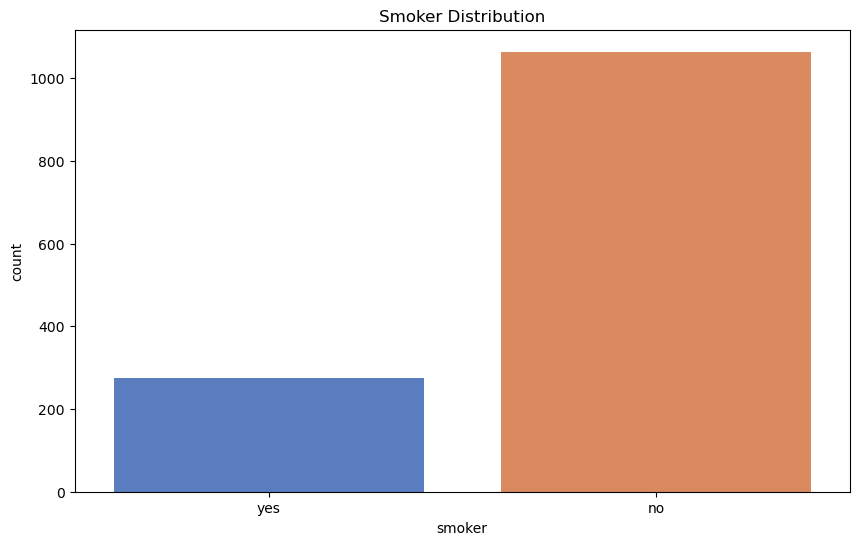

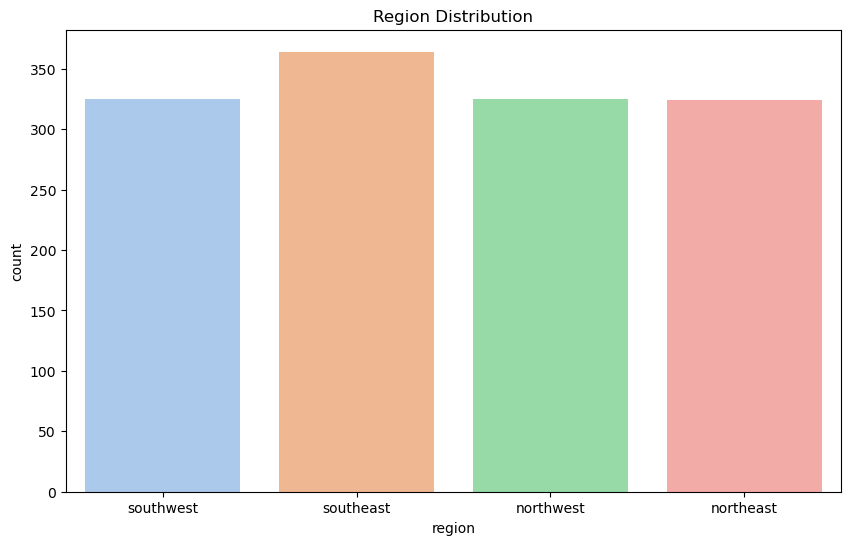

In [3]:
# Basic EDA Visualizations

# Histogram for Age 

plt.figure(figsize=(10, 6))
sns.histplot(data["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# BMI Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data["bmi"], bins=30, kde=True)
plt.title("BMI Distribution")
plt.show()

# Distplot for Charges Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["charges"], bins=30, kde=True)
plt.title("Charges Distribution")
plt.show()  

# Box Plot for Charges by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x="smoker", y="charges", data=data)
plt.title("Insurance Charges by Smoking Status")
plt.show()

# Scatter Plot for Age vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="charges", hue="smoker", data=data)
plt.title("Age vs Charges by Smoking Status")
plt.show()

# Scatter Plot for BMI vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x="bmi", y="charges", data=data, hue="smoker")
plt.title("Charges vs BMI by Smoking Status")
plt.show()

# Count Plot for Sex
plt.figure(figsize=(10, 6))
sns.countplot(x="sex", hue="sex", data=data, palette="pastel", legend=False)
plt.title("Sex Distribution")
plt.show()

# Count Plot for Children
plt.figure(figsize=(10, 6))
sns.countplot(x="children", hue="children", data=data, palette="bright", legend=False)
plt.title("Children Distribution")
plt.show()

# Count Plot for Smoker
plt.figure(figsize=(10, 6))
sns.countplot(x="smoker", hue="smoker", data=data, palette="muted", legend=False)
plt.title("Smoker Distribution")
plt.show()

# Count Plot for Region
plt.figure(figsize=(10, 6))
sns.countplot(x="region", hue="region", data=data, palette="pastel", legend=False)
plt.title("Region Distribution")
plt.show()

In [4]:
# Data Preprocessing:

# We will convert categorical variables into numerical ones

data.replace(
    {
        "sex": {"male": 0, "female": 1},
        "smoker": {"yes": 1, "no": 0},
        "region": {"southwest": 1, "southeast": 0, "northwest": 3, "northeast": 2},
    },
    inplace=True,
)
print(data.head(5))

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       1  16884.92400
1   18    0  33.770         1       0       0   1725.55230
2   28    0  33.000         3       0       0   4449.46200
3   33    0  22.705         0       0       3  21984.47061
4   32    0  28.880         0       0       3   3866.85520


In [5]:
# Splitting the data into features and target variable

X = data.drop("charges", axis = 1)
Y  = data["charges"]
print(X)
print("-" * 100)
print(Y)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]
----------------------------------------------------------------------------------------------------
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [6]:
# Splitting the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [7]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)  # Fit the model

# Predictions
Y_pred = lr.predict(X_test)
print("First 10 predictions:", Y_pred[:10])
print("-" * 50)

# Model Evaluation
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


First 10 predictions: [ 1520.59242161 11570.5920178  10082.43849883  2246.21754312
  7881.28362035 11081.50227956  3538.24791808   698.03224036
 12223.4851558   9611.93217623]
--------------------------------------------------
Mean Squared Error: 38337035.486438826
Root Mean Squared Error: 6191.690842285234
Mean Absolute Error: 4267.213826730729
R^2 Score: 0.7447273869684077


In [8]:
# Initialize the model
dt = DecisionTreeRegressor(random_state=2)

# Train the model
dt.fit(X_train, Y_train)

# Predict on test set
Y_pred_dt = dt.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(Y_test, Y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(Y_test, Y_pred_dt)
r2_dt = r2_score(Y_test, Y_pred_dt)

print("Decision Tree Regressor Performance")
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("MAE:", mae_dt)
print("R^2 Score:", r2_dt)
print("-" * 50)

Decision Tree Regressor Performance
MSE: 47459826.04564634
RMSE: 6889.109234556115
MAE: 3392.738660291045
R^2 Score: 0.6839819862184562
--------------------------------------------------


In [9]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model
rf.fit(X_train, Y_train)

# Predict on test set
Y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print("Random Forest Regressor Performance")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R^2 Score:", r2_rf)
print("-" * 50)


Random Forest Regressor Performance
MSE: 24509636.232438605
RMSE: 4950.720779082436
MAE: 2798.74355984306
R^2 Score: 0.8367990950233597
--------------------------------------------------


In [10]:
# Xgboost Regressor:

xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=2)
xgbr.fit(X_train, Y_train)
Y_pred_xgb = xgbr.predict(X_test)
mse_xgb = mean_squared_error(Y_test, Y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(Y_test, Y_pred_xgb)
r2_xgb = r2_score(Y_test, Y_pred_xgb)
print("XGBoost Regressor Performance")
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("MAE:", mae_xgb)
print("R^2 Score:", r2_xgb)

XGBoost Regressor Performance
MSE: 27868792.00218221
RMSE: 5279.090073315875
MAE: 3105.3586910121453
R^2 Score: 0.8144316777193814


## Hyperparameter Tuning for XGB and RandomForest:

In [11]:

params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3],
}

xgbr_tuned = xgb.XGBRegressor(objective="reg:squarederror", random_state=2)

search = RandomizedSearchCV(
    xgbr_tuned, params, n_iter=30, cv=5, scoring="r2", random_state=2, n_jobs=-1
)

search.fit(X_train, Y_train)
print("Best params:", search.best_params_)

Y_pred_tuned = search.best_estimator_.predict(X_test)
print("R²:", r2_score(Y_test, Y_pred_tuned))

Best params: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
R²: 0.8639096458438618


In [12]:
rf_params = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

rf_tuned = RandomForestRegressor(random_state=2)

search_rf = RandomizedSearchCV(
    rf_tuned, rf_params, n_iter=30, cv=5, scoring="r2", random_state=2, n_jobs=-1
)

search_rf.fit(X_train, Y_train)
print("Best params:", search_rf.best_params_)

Y_pred_rf_tuned = search_rf.best_estimator_.predict(X_test)
print("R²:", r2_score(Y_test, Y_pred_rf_tuned))

Best params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
R²: 0.8489046341826775


In [13]:
# Input data for prediction (age, sex, bmi, children, smoker, region)
input_data = (31, 1, 25.74, 0, 1, 0)

# Convert to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape to 2D array (1 sample, 6 features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# --- Linear Regression Prediction ---
prediction_lr = lr.predict(input_data_reshaped)
print("Linear Regression predicts USD:", prediction_lr[0])

# --- Decision Tree Prediction ---
prediction_dt = dt.predict(input_data_reshaped)
print("Decision Tree predicts USD:", prediction_dt[0])

# --- Random Forest Prediction ---
prediction_rf = rf.predict(input_data_reshaped)
print("Random Forest predicts USD:", prediction_rf[0])

# --- XGBoost Default Prediction ---
prediction_xgb = xgbr.predict(input_data_reshaped)
print("XGBoost (default) predicts USD:", prediction_xgb[0])

# --- XGBoost Tuned Prediction ---
prediction_xgb_tuned = search.best_estimator_.predict(input_data_reshaped)
print("XGBoost (tuned) predicts USD:", prediction_xgb_tuned[0])

# --- Random Forest Tuned Prediction ---
prediction_rf_tuned = search_rf.best_estimator_.predict(input_data_reshaped)
print("Random Forest (tuned) predicts USD:", prediction_rf_tuned[0])

Linear Regression predicts USD: 27688.182287107298
Decision Tree predicts USD: 19719.6947
Random Forest predicts USD: 20164.016569
XGBoost (default) predicts USD: 18875.871
XGBoost (tuned) predicts USD: 20462.287
Random Forest (tuned) predicts USD: 20992.352689027735


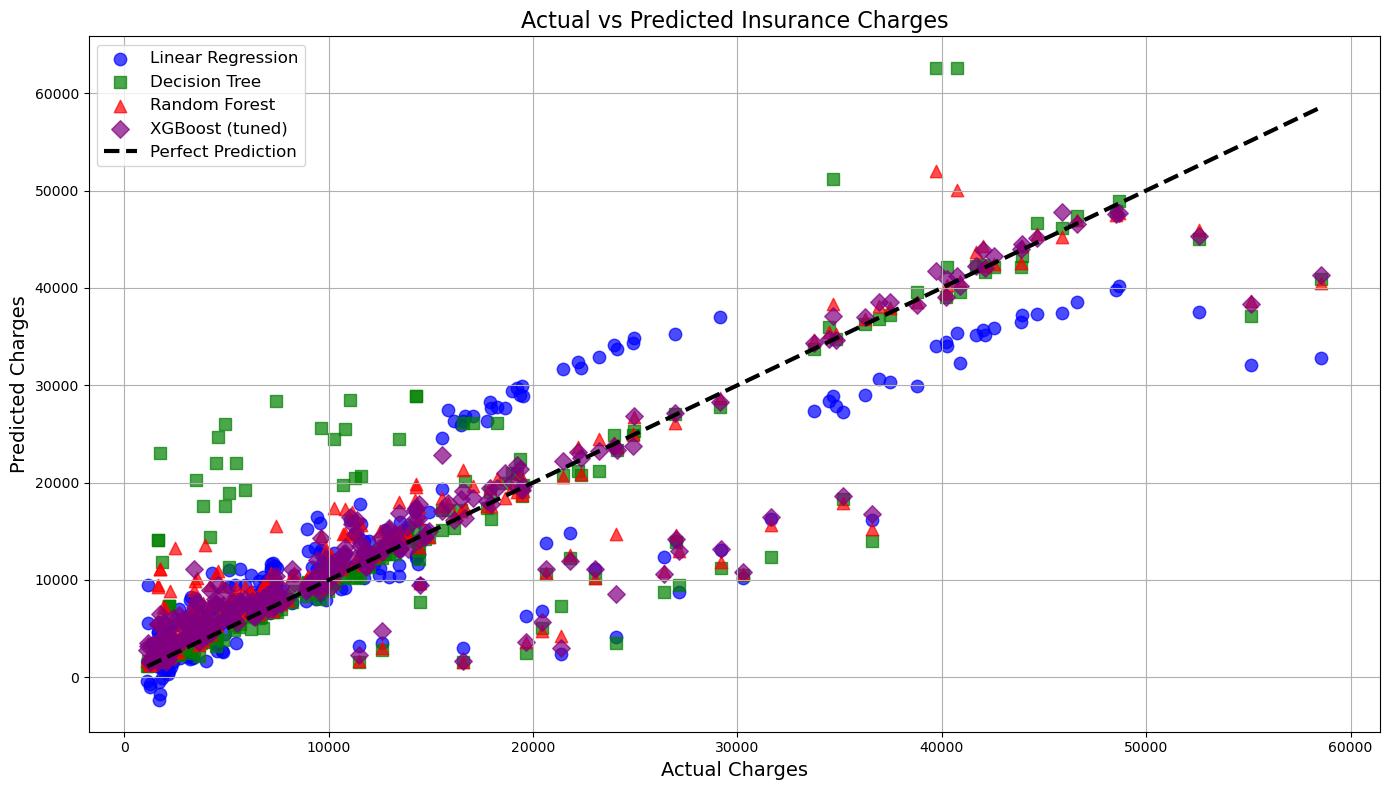

In [14]:
# Predict on test set
Y_pred_lr = lr.predict(X_test)
Y_pred_dt = dt.predict(X_test)
Y_pred_rf = rf.predict(X_test)
Y_pred_xgb_tuned = search.best_estimator_.predict(X_test)

plt.figure(figsize=(14, 8))

# Plot each model with larger, distinct markers and transparency
plt.scatter(Y_test, Y_pred_lr, color='blue', s=80, marker='o', alpha=0.7, label='Linear Regression')
plt.scatter(Y_test, Y_pred_dt, color='green', s=80, marker='s', alpha=0.7, label='Decision Tree')
plt.scatter(Y_test, Y_pred_rf, color='red', s=80, marker='^', alpha=0.7, label='Random Forest')
plt.scatter(
    Y_test,
    Y_pred_xgb_tuned,
    color="purple",
    s=80,
    marker="D",
    alpha=0.7,
    label="XGBoost (tuned)",
)

# Perfect prediction line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3, label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Charges", fontsize=14)
plt.ylabel("Predicted Charges", fontsize=14)
plt.title("Actual vs Predicted Insurance Charges", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()

In [19]:
import numpy as np
import pandas as pd

# Calculate absolute errors
error_lr = np.abs(Y_test - Y_pred_lr)
error_dt = np.abs(Y_test - Y_pred_dt)
error_rf = np.abs(Y_test - Y_pred_rf)
error_xgb_tuned = np.abs(Y_test - Y_pred_xgb_tuned)
count_xgb_tuned = count_within_threshold(error_xgb_tuned, thresholds)

# Define thresholds (you can adjust these)
thresholds = [500, 1000, 2000, 3000, 5000]  # in USD

# Function to count predictions within each threshold
def count_within_threshold(errors, thresholds):
    counts = {}
    for t in thresholds:
        counts[f"<= ${t}"] = np.sum(errors <= t)
    return counts

# Count predictions within thresholds
count_lr = count_within_threshold(error_lr, thresholds)
count_dt = count_within_threshold(error_dt, thresholds)
count_rf = count_within_threshold(error_rf, thresholds)
count_xgb_tuned = count_within_threshold(error_xgb_tuned, thresholds)
# Combine results in a DataFrame
df_counts = pd.DataFrame({
    "Linear Regression": count_lr,
    "Decision Tree": count_dt,
    "Random Forest": count_rf,
    "XGBoost (tuned)": count_xgb_tuned
})

print(df_counts)

          Linear Regression  Decision Tree  Random Forest  XGBoost (tuned)
<= $500                  29            135             74               63
<= $1000                 55            177            125              118
<= $2000                110            205            169              181
<= $3000                155            209            198              216
<= $5000                186            211            224              243


## Saving the best model (XGB Tuned):

In [18]:
model_data = {"model": search.best_estimator_, "feature_names": list(X_train.columns)}

pickle.dump(model_data, open("insurance_model.pkl", "wb"))